In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
path=r"C:\Users\Oluwasegun\Downloads\individual_stocks_5yr-20230429T004435Z-001\individual_stocks_5yr"
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(4752, 7)

In [3]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [4]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [5]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [6]:
all_data['date'][0]

0   2013-02-08
0   2014-03-27
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

In [7]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

## Analyse closing price of all the stocks

In [8]:
tech_list = all_data['Name'].unique()

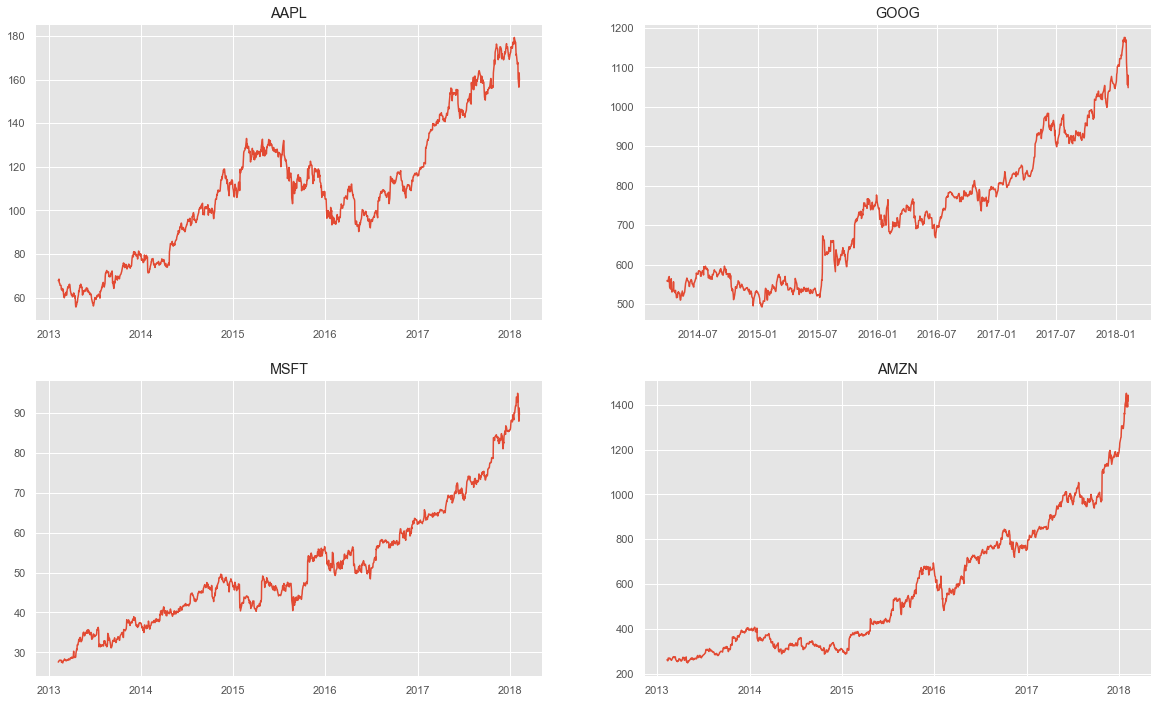

In [9]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

## Analyse the total volume of stock being traded each day

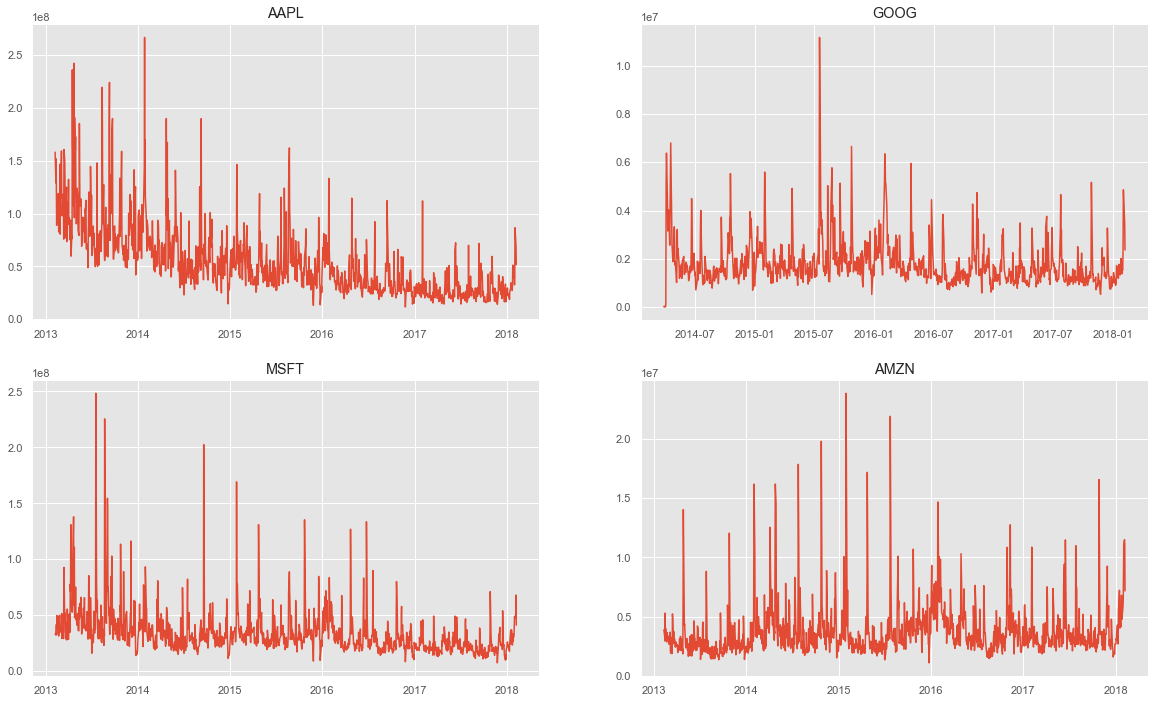

In [11]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)

## Doing same using plotly

In [12]:
import plotly .express as px

In [13]:
for company in (tech_list):
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x='date', y='volume', title=company)
    fig.show()

In [14]:
all_data['Name'].unique()

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

In [16]:
df_aapl = pd.read_csv(r"C:\Users\Oluwasegun\Downloads\individual_stocks_5yr-20230429T004435Z-001\individual_stocks_5yr\AAPL_data.csv")
df_aapl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [17]:
df_aapl['1day % return'] = ((df_aapl['close']-df_aapl['open'])/df_aapl['close'])*100
df_aapl.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   1day % return  
0       0.206325  
1       0.714688  
2      -2.481344  
3      -0.042869  
4       0.443624

In [20]:
#using plotly orand matplotlib to visualise data

fig=px.line(df_aapl, x='date', y='1day % return', title='AAPL stock Percentage return')
fig.show()

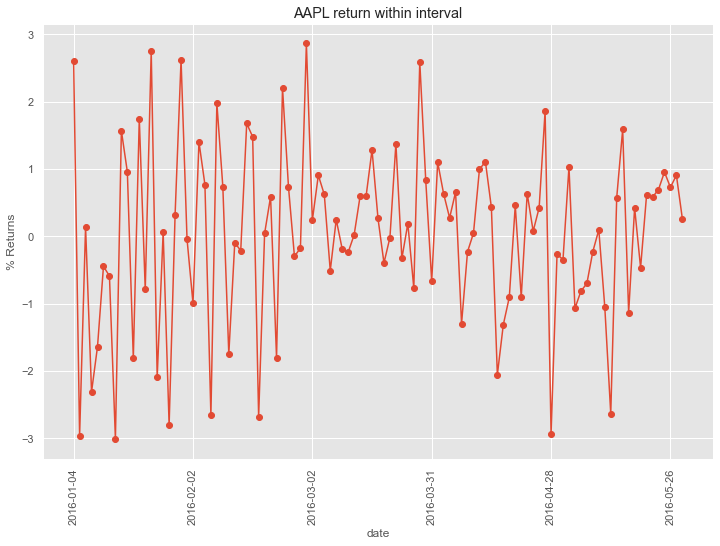

In [25]:
#Analyse return between an interval

plt.figure(figsize=(12,8))
df_aapl.set_index('date')['2016-01-01':'2016-05-31']['1day % return'].plot(kind='line',marker='o')
plt.xticks(rotation='vertical')
plt.ylabel('% Returns')
plt.title('AAPL return within interval')
plt.show()


### Analyse monthly mean of close column

In [26]:
df2=df_aapl.copy()

In [27]:
df2['date'] = pd.to_datetime(df2['date'])

In [28]:
df2.set_index('date',inplace=True)

In [29]:
df2.head()

open     high      low    close     volume  Name  1day % return
date                                                                          
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       0.206325
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       0.714688
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL      -2.481344
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL      -0.042869
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       0.443624

Text(0.5, 1.0, 'Monthly Average of Close')

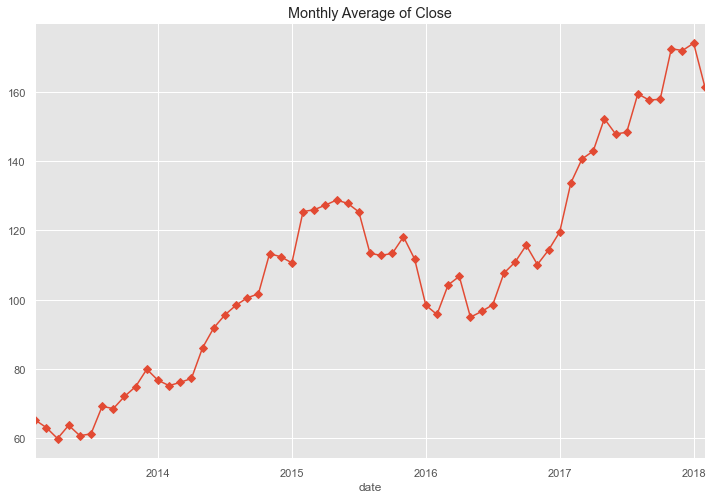

In [34]:
plt.figure(figsize=(12,8))
df2['close'].resample('M').mean().plot(marker='D')
plt.title('Monthly Average of Close')

### Analyse monthly mean of close column

Text(0.5, 1.0, 'Monthly Average of Close')

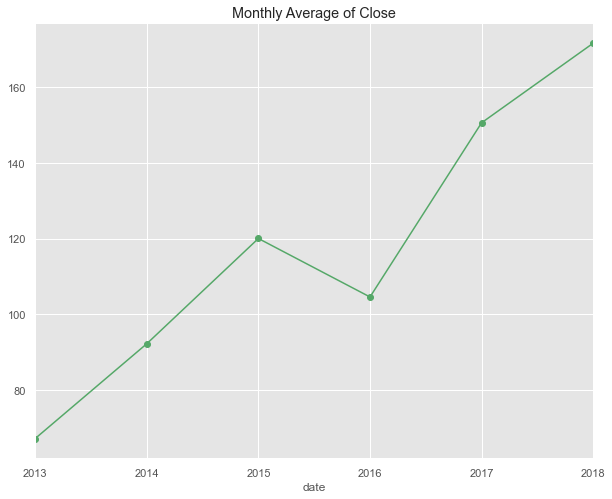

In [36]:
plt.figure(figsize=(10,8))
df2['close'].resample('Y').mean().plot(marker='o',color='g')
plt.title('Monthly Average of Close')

### Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated¶

In [37]:
df2.head()

open     high      low    close     volume  Name  1day % return
date                                                                          
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       0.206325
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       0.714688
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL      -2.481344
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL      -0.042869
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       0.443624

#### Reading the data of tech companies

In [39]:
aapl=pd.read_csv(r"C:\Users\Oluwasegun\Downloads\individual_stocks_5yr-20230429T004435Z-001\individual_stocks_5yr\AAPL_data.csv")
aapl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [40]:
goog=pd.read_csv(r"C:\Users\Oluwasegun\Downloads\individual_stocks_5yr-20230429T004435Z-001\individual_stocks_5yr\GOOGL_data.csv")
goog.head()

date      open      high       low     close   volume   Name
0  2013-02-08  390.4551  393.7283  390.1698  393.0777  6031199  GOOGL
1  2013-02-11  389.5892  391.8915  387.2619  391.6012  4330781  GOOGL
2  2013-02-12  391.2659  394.3440  390.0747  390.7403  3714176  GOOGL
3  2013-02-13  390.4551  393.0677  390.3750  391.8214  2393946  GOOGL
4  2013-02-14  390.2549  394.7644  389.2739  394.3039  3466971  GOOGL

In [41]:
amzn=pd.read_csv(r"C:\Users\Oluwasegun\Downloads\individual_stocks_5yr-20230429T004435Z-001\individual_stocks_5yr\AMZN_data.csv")
amzn.head()

date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [42]:
msft=pd.read_csv(r"C:\Users\Oluwasegun\Downloads\individual_stocks_5yr-20230429T004435Z-001\individual_stocks_5yr\MSFT_data.csv")
msft.head()

date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

In [43]:
### create a blank dataframe
close=pd.DataFrame()

In [44]:
close['aapl']=aapl['close']
close['goog']=goog['close']
close['amzn']=amzn['close']
close['msft']=msft['close']

In [45]:
close.head()

aapl      goog    amzn   msft
0  67.8542  393.0777  261.95  27.55
1  68.5614  391.6012  257.21  27.86
2  66.8428  390.7403  258.70  27.88
3  66.7156  391.8214  269.47  28.03
4  66.6556  394.3039  269.24  28.04

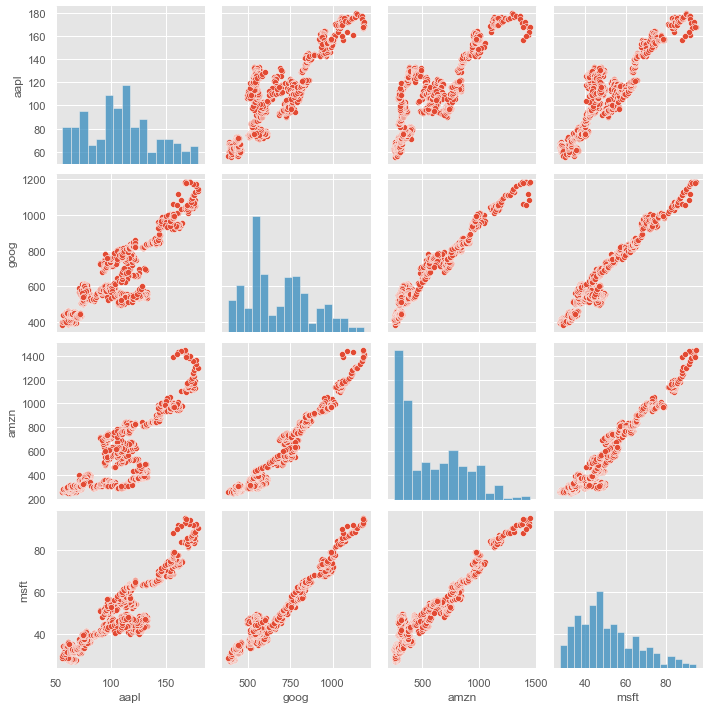

In [46]:
#Perform a Multi-variate Analysis
sns.pairplot(data=close)

<AxesSubplot:>

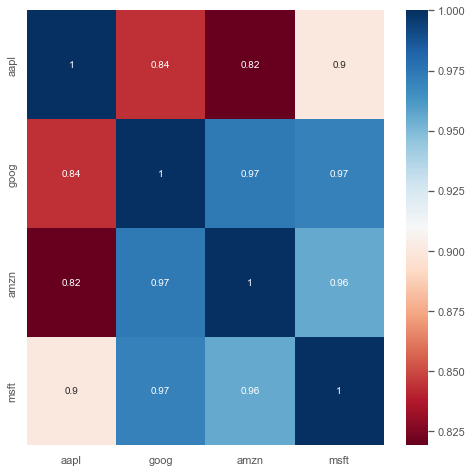

In [49]:
    # co-relation plot for stock prices
    plt.figure(figsize=(8,8))
    sns.heatmap(close.corr(),annot=True,cmap='RdBu')

<AxesSubplot:xlabel='msft', ylabel='goog'>

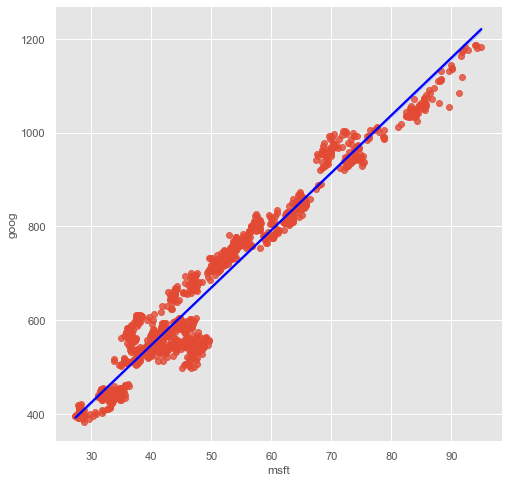

In [70]:
plt.figure(figsize=(8,8))
sns.regplot(x='msft',y='goog',data=close,line_kws={'color':'blue'})

#### Analyse Daily return of each stock & how they are co-related

In [51]:
data = pd.DataFrame()

In [52]:
aapl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [53]:
data['aapl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

In [54]:
data.head()

aapl_change  goog_change  amzn_change  msft_change
0     0.206325     0.667196     0.209964     0.725953
1     0.714688     0.513788    -2.328836     0.753769
2    -2.481344    -0.134514    -0.189409     0.000000
3    -0.042869     0.348705     2.946525     0.356761
4     0.443624     1.026873     0.694548     0.427960

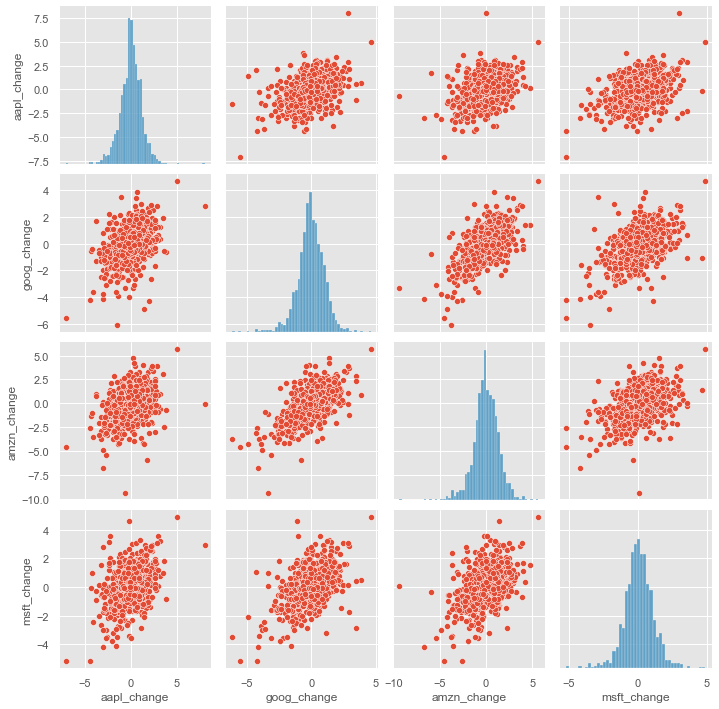

In [55]:
sns.pairplot(data=data)

<AxesSubplot:>

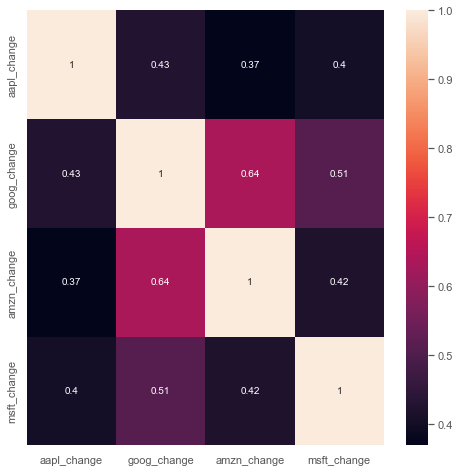

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

Amazon and microsoft have good correlation on daily returns

<AxesSubplot:xlabel='aapl_change', ylabel='Count'>

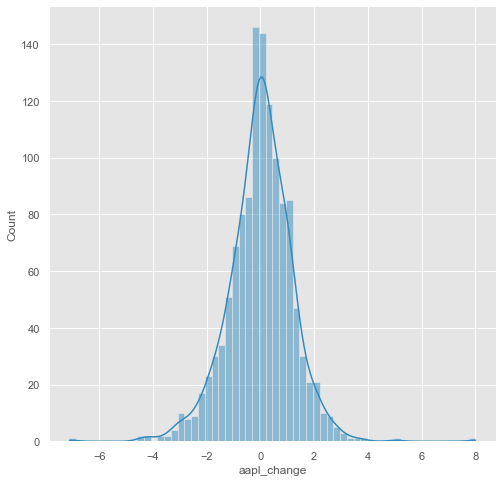

In [60]:
# Perform a Risk analysis for Apple
plt.figure(figsize=(8,8))
sns.histplot(data['aapl_change'],kde=True)

it somewhat follows a normal distribution

In [61]:
data['aapl_change'].std()

1.1871377131421237

In [62]:
data['aapl_change'].quantile(0.1)

-1.4246644227944307

In [64]:
data.describe().T

count      mean       std       min       25%       50%  \
aapl_change  1259.0 -0.000215  1.187138 -7.104299 -0.658021  0.042230   
goog_change  1259.0 -0.028349  1.052191 -6.107290 -0.575799 -0.004508   
amzn_change  1259.0 -0.000398  1.358679 -9.363077 -0.738341 -0.002623   
msft_change  1259.0  0.076404  1.059260 -5.177618 -0.509241  0.061069   

                  75%       max  
aapl_change  0.715427  8.000388  
goog_change  0.624730  4.652214  
amzn_change  0.852568  5.640265  
msft_change  0.703264  4.861491